<a href="https://colab.research.google.com/github/Jiwon510/MachineLearning/blob/main/%EC%B5%9C%EA%B7%BC%EC%A0%91_%EC%9D%B4%EC%9B%83_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. 데이터 준비

import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
# 2. 훈련 데이터, 테스트 데이터 분류

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
    )

In [ ]:
# 3. 데이터 전처리

# reshape : 1차원 배열을 2차원 배열로 변경
# skleran을 사용하려면 2차원 배열이어야 한다.
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [ ]:
# 4. 훈련

from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

# 과소적합
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9698823289099254
0.992809406101064


In [ ]:
# 오차

from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


In [ ]:
# 과대적합 - train 결정계수는 높지만, test 결정계수 점수가 낮은 경우
# 해결책 - 이웃 갯수를 증가

# 과소적합 - train 결정계수는 낮지만, test 결정계수 점수가 높은 경우
# 해결책 - 이웃 갯수를 감소

# 이웃점 갯수 줄이기 
knr.n_neighbors = 3

# 다시 훈련
knr.fit(train_input, train_target)

print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9804899950518966
0.9746459963987609


In [ ]:
# 5. 예측

# 50cm 농어의 무게 
print(knr.predict([[50]]))

[1033.33333333]


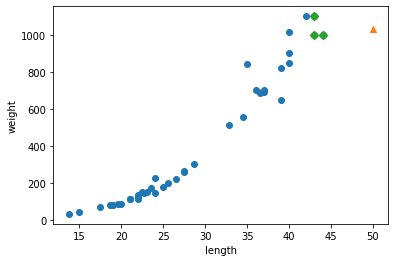

In [ ]:
# 6. 산점도 표시

import matplotlib.pyplot as plt

# 예측 데이터 객체
distances, indexes = knr.kneighbors([[50]])

# 훈련 데이터 산점도 표시
plt.scatter(train_input, train_target)

# 예측 데이터 산점도 표시
plt.scatter(50, 1033, marker='^')
plt.show

# 최근접 데이터 산점도 표시
plt.scatter (train_input[indexes], 
             train_target[indexes], marker='D')

plt.xlabel('length')
plt.ylabel('weight')

plt.show()